# Buenoes Aries Real-Estate 1

In this project, we have to create a model for client that can predict the price of apartments in the city of Buenos Aires — with a focus on apartments that cost less than $400,000 USD.

In [3]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [37]:
# create a function that extract file from input path and convert it in data frame 

# def wrangle(filepath):
#     # Read csv file into data format
#     df = pd.read_csv(filepath)
#     # return dataframe to the user
#     return df



# Updated wrangle function 

def wrangle(filepath):
    # Read csv file into data format
    df = pd.read_csv(filepath)


    # Subset Properties -> "Capital Federal"
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal") # it return true if Capital Federal is subset of string... 
    
    # Subset as "apartments"
    mask_apt = df["property_type"] == "apartment"

    # Subset for currency less than 400,000
    mask_price = df["price_aprox_usd"] < 400_000

    # subset for area to prevent skewness
    low,high = df["surface_covered_in_m2"].quantile([0.1,0.9])
    mask_area = df["surface_covered_in_m2"].between(low,high)


    df=df[mask_ba & mask_apt & mask_price & mask_area]


    # return dataframe to the user
    return df

In [38]:
# Load data using wrangle function to df 

df = wrangle("C:\\Users\\ujjwa\\Desktop\\Hackathons and Challenges\\Buenos-aries-real-estate\\buenos-airies-real-estate-1.csv")


In [39]:
print("df shape: ", df.shape)
df.head()

df shape:  (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450,http://once.properati.com.ar/suwa_venta_depart...


In [14]:
# function to check whether data is correctly formatted or not

assert (
    len(df) <= 8606
), f"`df` should have no more than 8606 observations, not {len(df)}."

# Data Manipulation
So now we have to subset the data under some conditions 
1> only includes apartments in Buenos Aires ("Capital Federal")
2> cost less than $400,000 USD

In [10]:
# Firstly we found of apartments from ("Capital Federal")
mask_ba = df["place_with_parent_names"].str.contains("Capital Federal") # it return true if Capital Federal is subset of string... 

df[mask_ba].head() # only get those which return true.

# AS it is working now we again update our wrangle function above with these codes...

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
11,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6050060697,-58.4001162302",60000.0,USD,909744.0,60000.0,28.0,28.0,2142.857143,2142.857143,NaN,1.0,NaN,http://once.properati.com.ar/zz0q_venta_depart...
18,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5646269,-58.4412741",600000.0,USD,9097440.0,600000.0,220.0,NaN,2727.272727,NaN,NaN,5.0,NaN,http://belgrano.properati.com.ar/jvge_venta_de...


In [21]:
# More Exploration in data 

# Type of Properties in dataset 
df["property_type"].unique() # we only need apartments (Condition 2)

mask_apt = df["property_type"] == "apartment"
mask_apt.head()

df["property_type"].unique() # we got all as apartment 
# Now we again update our code for wrangle to satisfy condition mentioned.... 

array(['apartment'], dtype=object)

In [24]:
# At last to satisfy third condition for less than 400,000 USD (Condition 3)

# Checking for possible values of currencies in our dataset..
df["currency"].unique() # We need only USD

# Lets check for all colouns hope we get something relatable there

df.info() # we found coloumn "price_aprox_usd" in which values are in usd best fit for us...

mask_price = df["price_aprox_usd"] < 400_000
mask_price.head()

# Now third condition get satisfied also so we finally go to last update of our wrangle function...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 8604
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   2068 non-null   object 
 1   property_type               2068 non-null   object 
 2   place_with_parent_names     2068 non-null   object 
 3   lat-lon                     1984 non-null   object 
 4   price                       1944 non-null   float64
 5   currency                    1944 non-null   object 
 6   price_aprox_local_currency  1944 non-null   float64
 7   price_aprox_usd             1944 non-null   float64
 8   surface_total_in_m2         1430 non-null   float64
 9   surface_covered_in_m2       1859 non-null   float64
 10  price_usd_per_m2            1314 non-null   float64
 11  price_per_m2                1752 non-null   float64
 12  floor                       533 non-null    float64
 13  rooms                       1580 

0      True
4      True
9      True
11     True
18    False
Name: price_aprox_usd, dtype: bool

In [28]:
# Check your work
assert (
    len(df) <= 1781
), f"`df` should have no more than 1781 observations, not {len(df)}."

# LETS START EXPLORATION (TIME FOR DATA ANALYSIS....)

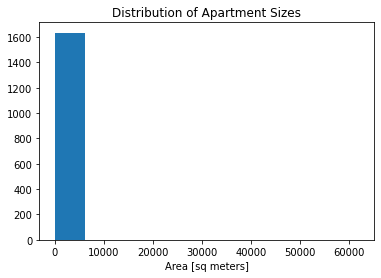

In [32]:
# Area Histogram
plt.hist(df["surface_covered_in_m2"])

#labelling axis
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");


### Interprating Histogram
Majority of apartment sizes lies between range 0  to 500(meter squares ). It seems true but may have outliers also , so we interpret it using numerical analysis... 

In [33]:
# we are only interseted in surface area column of the dataset

df.describe()["surface_covered_in_m2"]

count     1635.000000
mean        97.877064
std       1533.057610
min          0.000000
25%         38.000000
50%         50.000000
75%         73.000000
max      62034.000000
Name: surface_covered_in_m2, dtype: float64

### what we interpret?

Our minimum surface area is 0 , which really unrealistic (cannot see or have a flat with 0 surface area... )  🤣🤣🤣🤣

Maximum surface area for apartment is  62034.000000 which is also reasonable  if insights on other values

NOTE -> Almost half of our properties (50 %) surface result is 50.000000, and almost (75%) (one third ) results in 73.000000. Then how will it giving max as 62034.000000, this tells that there is definately a outdate data which highly skewed .

Another proof -> Note that our mean result as   97.877064 while our standard deviations differ a lot as compare to mean ie 1533.057610



In [36]:
# Removing Outliers from data (Skewness) and update our wrangle function to extract only refined portion

# Our intrest coloumn "surface_covered_in_m2" and want quantile from that specific coloumn
df["surface_covered_in_m2"].quantile([0.1,0.9])

# So 31 is cutoff for our bottom 10% and then 100 is our coutoff for top 90%


# Seperate then in two different values
low,high = df["surface_covered_in_m2"].quantile([0.1,0.9])

# Creating subset relation 
mask_area = df["surface_covered_in_m2"].between(low,high)

# Check for result
mask_area.head() 

# So it is working well, now we update the wrangle again 

0     False
4      True
9      True
11    False
20    False
Name: surface_covered_in_m2, dtype: bool

# Price and Surface Area Scatterplot

Text(0.5, 1.0, 'Buenos Airies : Price vs. Area')

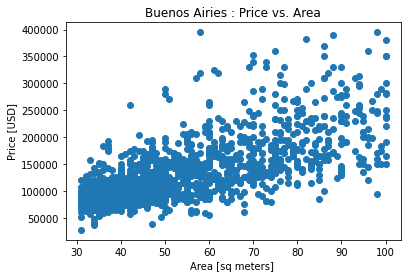

In [40]:
plt.scatter(x =df["surface_covered_in_m2"], y=df["price_aprox_usd"])
plt.xlabel("Area [sq meters] ")
plt.ylabel("Price [USD]")
plt.title("Buenos Airies : Price vs. Area")

# MODEL CREATION ( LINEAR REGRESSION )



In [46]:
# we had to split data , we have only two ways feature 
# 1> feature matrix (X)    2> target vector(y)

features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.head()
X_train.shape

(1343, 1)

In [49]:
target = "price_aprox_usd"
y_train = df[target]
y_train.head()
y_train.shape

(1343,)

In [51]:
# MODEL

# 3 different parts of a model creation

# 1> Baseline     2>                    3> Evaluation


# Baseline (Set performance range for model to be good or not )
# Steps for Baseline
    # Check whether it is regression or classification ?? (it is regression as it contain continuous values)
    # Finding mean for y train (if it is regression/ naive model).

y_mean = y_train.mean()
y_mean

135527.83871928515

In [56]:
# Complete our mean , now esemble prediction baseline

y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]
len(y_pred_baseline) == len(y_train)

True

### BASELINE SCATTERPLOT

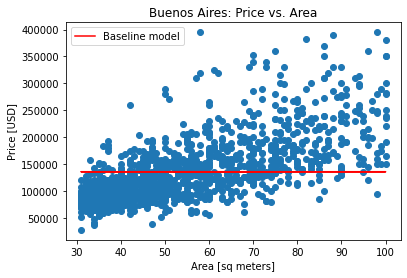

In [59]:
plt.plot(X_train,y_pred_baseline,color ="red", label = "Baseline model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

In [60]:
# Performace metrics

# mean absolute error is famous for regression

mae_baseline = mean_absolute_error(y_train,y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.46


In [61]:
#  steps to model creation
#  1> Instantiate   2> Train   3> Predict

# Instantiate model
model = LinearRegression()

In [62]:
# Train Model

model.fit(X_train,y_train)

LinearRegression()

In [65]:
# Generate Prediction

y_pred_training = model.predict(X_train) # you can use test set also
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

In [66]:
# MODEL EVALUATION USING MAE

mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 31248.26


In [68]:
# EXTRACT MODEL INTERCEPT

intercept = round(model.intercept_,2)
print("Model Intercept:", intercept)


Model Intercept: 11433.31


In [70]:
# EXTRACT MODEL COFFICIENT

coefficient = round(model.coef_[0],2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)

Model coefficient for "surface_covered_in_m2": 2253.12


In [72]:
# GENERATING EQUATION

print(f"apt_price= {intercept} + {coefficient} * surface_covered")

apt_price= 11433.31 + 2253.12 * surface_covered


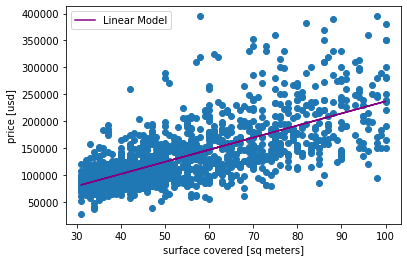

In [74]:
# PLOT MODEL

plt.plot(X_train, model.predict(X_train), color = "purple", label = "Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();